In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
print(recent_date)


('2017-08-23',)


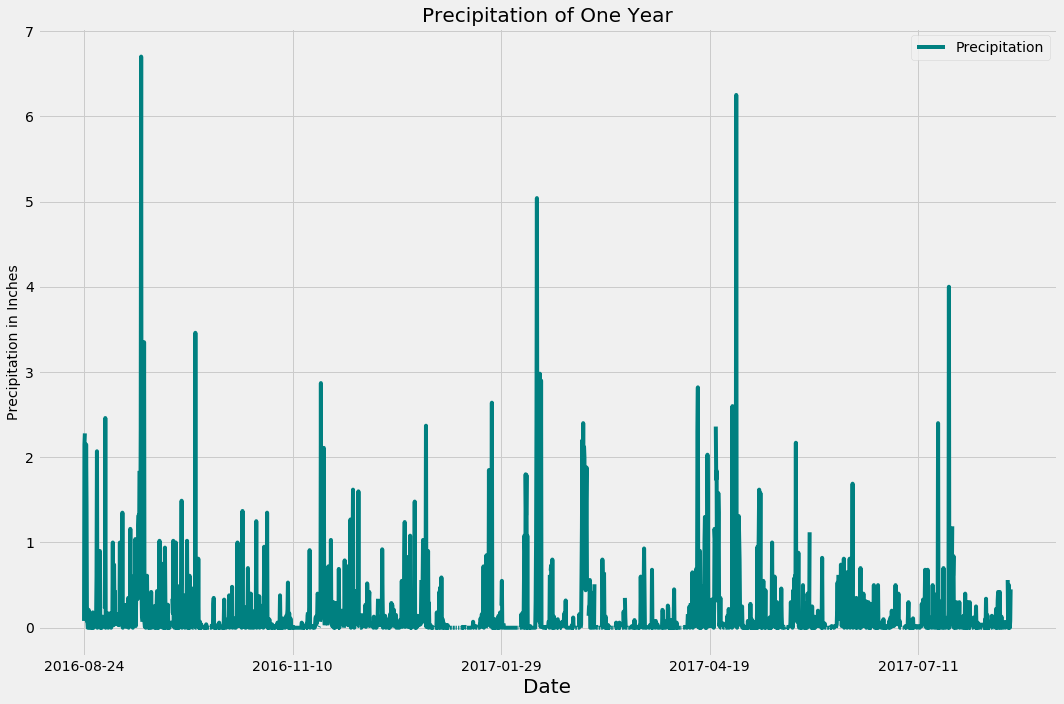

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = list(np.ravel(recent_date))[0]
most_recent_date = dt.datetime.strptime(most_recent, '%Y-%m-%d')
latest_year = int(dt.datetime.strftime(most_recent_date, '%Y'))
latest_month = int(dt.datetime.strftime(most_recent_date, '%m'))
latest_day = int(dt.datetime.strftime(most_recent_date, '%d'))

# Calculate the date one year from the last date in data set.
year_before = dt.date(latest_year, latest_month, latest_day) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rain_data = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_before).order_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_data)
rain_df = rain_df.set_index('date')

# Sort the dataframe by date
rain_df= rain_df.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data

rain_df.plot(figsize=(15,10), color='teal',fontsize = 14)
plt.xlabel("Date",fontsize = 20,)
plt.ylabel("Precipitation in Inches",fontsize = 14)
plt.title("Precipitation of One Year",fontsize = 20)
plt.legend(["Precipitation"], loc = 1)
plt.tight_layout()
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(Station).count()
print(f"There are {stations_count} stations")

There are 9 stations


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_active = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stationID = stations_active[0][0]

lowest_temp = (session.query(Measurement.tobs).filter(Measurement.station == stationID).order_by(Measurement.tobs.asc()).first())
lowest_temp = lowest_temp[0]
print(f"The lowest temperature recorded was {lowest_temp} degrees.")

highest_temp = (session.query(Measurement.tobs).filter(Measurement.station == stationID).order_by(Measurement.tobs.desc()).first())
highest_temp = highest_temp[0]
print(f"The highest temperature recorded was {highest_temp} degrees.")

avg_temp = (session.query(func.avg(Measurement.tobs)).filter(Measurement.station == stationID))
avg_temp = '{0:.3}'.format(avg_temp[0][0])
print(f"The average temperature recorded was {avg_temp} degrees.")

The lowest temperature recorded was 54.0 degrees.
The highest temperature recorded was 85.0 degrees.
The average temperature recorded was 71.7 degrees.


Text(0.5, 1.0, 'Station Histogram')

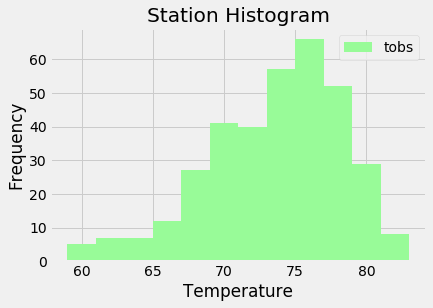

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = (session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > yearBefore).filter(Measurement.station == stationID).order_by(Measurement.date).all())
temp_df = pd.DataFrame(temp_data)
temp_df = temp_df.set_index('date')
temp_df = temp_df.sort_index(ascending=True)

temp_df.plot(kind='hist', bins=12, color = 'palegreen')
plt.xlabel('Temperature')
plt.title('Station Histogram')

# Close session

In [16]:
# Close Session
session.close()